# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

* Nama: Rizal Gibran Aldrin
* Email: gibran.aldrin.p@gmail.com
* Id Dicoding: ergeape

## Persiapan

### Menyiapkan library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

### Menyiapkan data yang akan diguankan

In [ ]:
url = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv'
data = pd.read_csv(url, sep=';')
data.head()

Marital_status  Application_mode  Application_order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime_evening_attendance  Previous_qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous_qualification_grade  Nacionality  Mothers_qualification  \
0                         122.0            1                     19   
1                         160.0            1                      1   
2                         122.0            1                     37   
3                         122.0            1                     38   
4                         100.0            1                     37   

   Fathers_qualification  ...  Curricular_units_2nd_sem_credited  \
0                     12  ...                                  0   
1                      3  ...                                  0   
2                     37  ...                                  0   
3                     37  ...                                  0   
4                     38  ...                                  0   

   Curricular_units_2nd_sem_enrolled  Curricular_units_2nd_sem_evaluations  \
0                                  0                                     0   
1                                  6                                     6   
2                                  6                                     0   
3                                  6                                    10   
4                                  6                                     6   

   Curricular_units_2nd_sem_approved  Curricular_units_2nd_sem_grade  \
0                                  0                        0.000000   
1                                  6                       13.666667   
2                                  0                        0.000000   
3                                  5                       12.400000   
4                                  6                       13.000000   

   Curricular_units_2nd_sem_without_evaluations  Unemployment_rate  \
0                                             0               10.8   
1                                             0               13.9   
2                                             0               10.8   
3                                             0                9.4   
4                                             0               13.9   

   Inflation_rate   GDP    Status  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

Data yang digunakan yaitu Students' Dropout and Academic Success, bersumber dari [UCI](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success).

Dataset ini dibuat dari lembaga pendidikan tinggi (diperoleh dari beberapa basis data terpisah) yang terkait dengan mahasiswa yang terdaftar dalam berbagai gelar sarjana, seperti agronomi, desain, pendidikan, keperawatan, jurnalisme, manajemen, layanan sosial, dan teknologi. Dataset tersebut mencakup informasi yang diketahui pada saat pendaftaran mahasiswa (jalur akademik, demografi, dan faktor sosial-ekonomi) dan kinerja akademik mahasiswa pada akhir semester pertama dan kedua.

Berdasarkan informasi dari UCI, variabel-variabel pada dataset ini adalah sebagai berikut:

* Marital status: The marital status of the student.
 * (Categorical) 1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated
* Application mode: The method of application used by the student.
  * (Categorical) 1 - 1st phase - general contingent 2 - Ordinance No. 612/93 5 - 1st phase - special contingent (Azores Island) 7 - Holders of other higher courses 10 - Ordinance No. 854-B/99 15 - International student (bachelor) 16 - 1st phase - special contingent (Madeira Island) 17 - 2nd phase - general contingent 18 - 3rd phase - general contingent 26 - Ordinance No. 533-A/99, item b2) (Different Plan) 27 - Ordinance No. 533-A/99, item b3 (Other Institution) 39 - Over 23 years old 42 - Transfer 43 - Change of course 44 - Technological specialization diploma holders 51 - Change of institution/course 53 - Short cycle diploma holders 57 - Change of institution/course (International)
* Application order: The order in which the student applied.
  * (Numerical) Application order (between 0 - first choice; and 9 last choice)
* Course: The course taken by the student.
  * (Categorical) 33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (evening attendance) 9003 - Agronomy 9070 - Communication Design 9085 - Veterinary Nursing 9119 - Informatics Engineering 9130 - Equinculture 9147 - Management 9238 - Social Service 9254 - Tourism 9500 - Nursing 9556 - Oral Hygiene 9670 - Advertising and Marketing Management 9773 - Journalism and Communication 9853 - Basic Education 9991 - Management (evening attendance)
* Daytime/evening attendance: Whether the student attends classes during the day or in the evening.
  * (Categorical) 1 – daytime 0 - evening
* Previous qualification: The qualification obtained by the student before enrolling in higher education.
  * (Categorical) 1 - Secondary education 2 - Higher education - bachelor's degree 3 - Higher education - degree 4 - Higher education - master's 5 - Higher education - doctorate 6 - Frequency of higher education 9 - 12th year of schooling - not completed 10 - 11th year of schooling - not completed 12 - Other - 11th year of schooling 14 - 10th year of schooling 15 - 10th year of schooling - not completed 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv. 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 42 - Professional higher technical course 43 - Higher education - master (2nd cycle)
* Previous qualification (grade): Grade of previous qualification (between 0 and 200)
* Nacionality: The nationality of the student.
  * (Categorical) 1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova (Republic of); 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian
* Mother's qualification: The qualification of the student's mother.
  * (Categorical) 1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 22 - Technical-professional course 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)
* Father's qualification: The qualification of the student's father.
  * (Categorical) 1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 13 - 2nd year complementary high school course 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 20 - Complementary High School Course 22 - Technical-professional course 25 - Complementary High School Course - not concluded 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 31 - General Course of Administration and Commerce 33 - Supplementary Accounting and Administration 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)
* Mother's occupation:	The occupation of the student's mother.
  * (Categorical) 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 122 - Health professionals 123 - teachers 125 - Specialists in information and communication technologies (ICT) 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 171 - Skilled construction workers and the like, except electricians 173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like 175 - Workers in food processing, woodworking, clothing and other industries and crafts 191 - cleaning workers 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants
* Father's occupation:	The occupation of the student's father.
  * (Categorical) 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 101 - Armed Forces Officers 102 - Armed Forces Sergeants 103 - Other Armed Forces personnel 112 - Directors of administrative and commercial services 114 - Hotel, catering, trade and other services directors 121 - Specialists in the physical sciences, mathematics, engineering and related techniques 122 - Health professionals 123 - teachers 124 - Specialists in finance, accounting, administrative organization, public and commercial relations 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 135 - Information and communication technology technicians 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 154 - Protection and security services personnel 161 - Market-oriented farmers and skilled agricultural and animal production workers 163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence 171 - Skilled construction workers and the like, except electricians 172 - Skilled workers in metallurgy, metalworking and similar 174 - Skilled workers in electricity and electronics 175 - Workers in food processing, woodworking, clothing and other industries and crafts 181 - Fixed plant and machine operators 182 - assembly workers 183 - Vehicle drivers and mobile equipment operators 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants 195 - Street vendors (except food) and street service providers
* Admission grade:	Admission grade (between 0 and 200)
* Displaced:	Whether the student is a displaced person.
  * (Categorical) 1 – yes 0 – no
* Educational special needs:	Whether the student has any special educational needs. (Categorical) 1 – yes 0 – no
* Debtor:	Whether the student is a debtor.
  * (Categorical) 1 – yes 0 – no
* Tuition fees up to date:	Whether the student's tuition fees are up to date.
  * (Categorical) 1 – yes 0 – no
* Gender:	The gender of the student.
  * (Categorical) 1 – male 0 – female
* Scholarship holder:	Whether the student is a scholarship holder.    
  * (Categorical) 1 – yes 0 – no
* Age at enrollment:	The age of the student at the time of enrollment. (Numerical)
* International:	Whether the student is an international student.
  * (Categorical) 1 – yes 0 – no
* Curricular units 1st sem (credited):	The number of curricular units credited by the student in the first semester. (Numerical)
* Curricular units 1st sem (enrolled):	The number of curricular units enrolled by the student in the first semester. (Numerical)
* Curricular units 1st sem (evaluations):	The number of curricular units evaluated by the student in the first semester. (Numerical)
* Curricular units 1st sem (approved):	The number of curricular units approved by the student in the first semester. (Numerical)

## Data Understanding

#### Cek struktur data

In [ ]:
# Ukuran data
print(f"Jumlah baris dan kolom: {data.shape}")

Jumlah baris dan kolom: (4424, 37)


Dataset memiliki baris sebanyak 4.424 dan terdapat 37 kolom

In [ ]:
# Info kolom
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

* Terdapat 1 kolom dengan tipe object, yaitu : Status
* Terdapat 7 kolom numerik dengan tipe data float64, yaitu : Previous_qualification_grade, Admission_grade, Curricular_units_1st_sem_grade, Curricular_units_2nd_sem_grade, Unemployment_rate, Inflation_rate, dan GDP
* Terdapat 29 kolom numerik dengan tipe int64, yaitu: Marital_status, Application_mode, Application_order,Course, Daytime_evening_attendance, Previous_qualification, Nacionality, Mothers_qualification, Fathers_qualification, Mothers_occupation, Fathers_occupation, Displaced
Educational_special_needs, Debtor, Tuition_fees_up_to_date, Gender, Scholarship_holder, Age_at_enrollment, International, Curricular_units_1st_sem_credited, Curricular_units_1st_sem_enrolled, Curricular_units_1st_sem_evaluations, Curricular_units_1st_sem_approved, Curricular_units_1st_sem_without_evaluations, Curricular_units_2nd_sem_credited, Curricular_units_2nd_sem_enrolled, Curricular_units_2nd_sem_evaluations, Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_without_evaluations  


In [ ]:
# Statistik deskriptif
data.describe(include='all').T

count unique       top  freq  \
Marital_status                                4424.0    NaN       NaN   NaN   
Application_mode                              4424.0    NaN       NaN   NaN   
Application_order                             4424.0    NaN       NaN   NaN   
Course                                        4424.0    NaN       NaN   NaN   
Daytime_evening_attendance                    4424.0    NaN       NaN   NaN   
Previous_qualification                        4424.0    NaN       NaN   NaN   
Previous_qualification_grade                  4424.0    NaN       NaN   NaN   
Nacionality                                   4424.0    NaN       NaN   NaN   
Mothers_qualification                         4424.0    NaN       NaN   NaN   
Fathers_qualification                         4424.0    NaN       NaN   NaN   
Mothers_occupation                            4424.0    NaN       NaN   NaN   
Fathers_occupation                            4424.0    NaN       NaN   NaN   
Admission_grade                               4424.0    NaN       NaN   NaN   
Displaced                                     4424.0    NaN       NaN   NaN   
Educational_special_needs                     4424.0    NaN       NaN   NaN   
Debtor                                        4424.0    NaN       NaN   NaN   
Tuition_fees_up_to_date                       4424.0    NaN       NaN   NaN   
Gender                                        4424.0    NaN       NaN   NaN   
Scholarship_holder                            4424.0    NaN       NaN   NaN   
Age_at_enrollment                             4424.0    NaN       NaN   NaN   
International                                 4424.0    NaN       NaN   NaN   
Curricular_units_1st_sem_credited             4424.0    NaN       NaN   NaN   
Curricular_units_1st_sem_enrolled             4424.0    NaN       NaN   NaN   
Curricular_units_1st_sem_evaluations          4424.0    NaN       NaN   NaN   
Curricular_units_1st_sem_approved             4424.0    NaN       NaN   NaN   
Curricular_units_1st_sem_grade                4424.0    NaN       NaN   NaN   
Curricular_units_1st_sem_without_evaluations  4424.0    NaN       NaN   NaN   
Curricular_units_2nd_sem_credited             4424.0    NaN       NaN   NaN   
Curricular_units_2nd_sem_enrolled             4424.0    NaN       NaN   NaN   
Curricular_units_2nd_sem_evaluations          4424.0    NaN       NaN   NaN   
Curricular_units_2nd_sem_approved             4424.0    NaN       NaN   NaN   
Curricular_units_2nd_sem_grade                4424.0    NaN       NaN   NaN   
Curricular_units_2nd_sem_without_evaluations  4424.0    NaN       NaN   NaN   
Unemployment_rate                             4424.0    NaN       NaN   NaN   
Inflation_rate                                4424.0    NaN       NaN   NaN   
GDP                                           4424.0    NaN       NaN   NaN   
Status                                          4424      3  Graduate  2209   

                                                     mean          std   min  \
Marital_status                                   1.178571     0.605747   1.0   
Application_mode                                18.669078    17.484682   1.0   
Application_order                                1.727848     1.313793   0.0   
Course                                        8856.642631  2063.566416  33.0   
Daytime_evening_attendance                       0.890823     0.311897   0.0   
Previous_qualification                           4.577758    10.216592   1.0   
Previous_qualification_grade                   132.613314    13.188332  95.0   
Nacionality                                      1.873192     6.914514   1.0   
Mothers_qualification                           19.561935    15.603186   1.0   
Fathers_qualification                           22.275316    15.343108   1.0   
Mothers_occupation                              10.960895    26.418253   0.0   
Fathers_occupation                              11.032324     25.26304   0.0   
Admi

Fungsi kode diatas untuk memberikan ringkasan statistik yang berguna untuk memahami karakteristik data numerik dalam data frame atau seri. Outputnya berisi informasi tentang jumlah data, rata-rata, standar deviasi, nilai minimum dan maksimum, serta kuartil (25%, 50%, dan 75%). Dengan menambahkan `include='all'` metode ini akan mencakup kolom numerik maupun kolom kategorikal dan `.T` digunakan untuk melakukan transpose pada hasil output, yaitu menukar posisi baris dan kolom pada tabel hasil. Ini seringkali membuat output lebih mudah dibaca, terutama jika Anda memiliki banyak kolom, karena statistik untuk setiap kolom ditampilkan dalam baris daripada kolom.

In [ ]:
print(data.nunique())

Marital_status                                    6
Application_mode                                 18
Application_order                                 8
Course                                           17
Daytime_evening_attendance                        2
Previous_qualification                           17
Previous_qualification_grade                    101
Nacionality                                      21
Mothers_qualification                            29
Fathers_qualification                            34
Mothers_occupation                               32
Fathers_occupation                               46
Admission_grade                                 620
Displaced                                         2
Educational_special_needs                         2
Debtor                                            2
Tuition_fees_up_to_date                           2
Gender                                            2
Scholarship_holder                                2
Age_at_enrol

Metode `.nunique()` ini menghitung jumlah nilai berbeda (unik) yang tidak kosong untuk setiap kolom dalam DataFrame. Hasil output akan berupa series di mana index-nya adalah nama kolom dan nilai yang sesuai adalah jumlah nilai unik di kolom tersebut. Ini membantu dalam mengidentifikasi kolom yang memiliki jumlah nilai unik yang sedikit (berpotensi sebagai fitur kategorikal) dibandingkan dengan kolom yang memiliki jumlah nilai unik yang besar (berpotensi sebagai kolom numerik atau identifikasi).

#### Cek missing values & duplicate

In [ ]:
print(data.isnull().sum())

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [ ]:
print(data.duplicated().sum())

0


Tidak ada kolom yang kosong dan duplikasi

#### EDA

Cek distribusi target

In [ ]:
# Cek nilai unik dan distribusi target
print(data['Status'].value_counts())

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


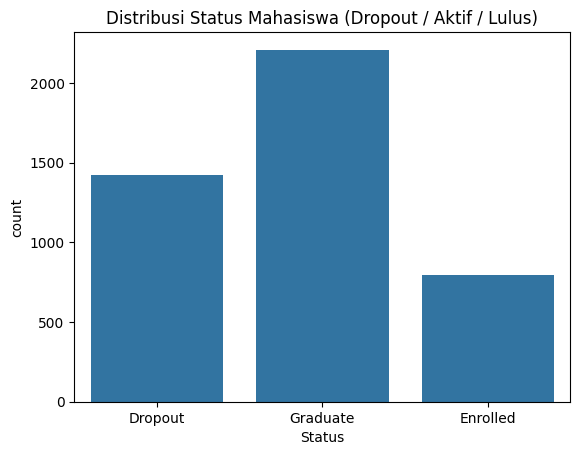

In [ ]:
sns.countplot(data=data, x='Status')
plt.title("Distribusi Status Mahasiswa (Dropout / Aktif / Lulus)")
plt.show()

Terdapat 3 kelas target yaitu Graduate dengan distribusi 2.209 data, Dropout dengan distribusi 1.421 data dan Enrolled dengan distribusi 794 data. Variabel Status ini yang nantinya akan kita jadikan target untuk memprediksi dropout mahasiswa.

In [ ]:
siswa_pertama = data.iloc[1]
siswa_pertama

Marital_status                                          1
Application_mode                                       15
Application_order                                       1
Course                                               9254
Daytime_evening_attendance                              1
Previous_qualification                                  1
Previous_qualification_grade                        160.0
Nacionality                                             1
Mothers_qualification                                   1
Fathers_qualification                                   3
Mothers_occupation                                      3
Fathers_occupation                                      3
Admission_grade                                     142.5
Displaced                                               1
Educational_special_needs                               0
Debtor                                                  0
Tuition_fees_up_to_date                                 0
Gender                                                  1
Scholarship_holder                                      0
Age_at_enrollment                                      19
International                                           0
Curricular_units_1st_sem_credited                       0
Curricular_units_1st_sem_enrolled                       6
Curricular_units_1st_sem_evaluations                    6
Curricular_units_1st_sem_approved                       6
Curricular_units_1st_sem_grade                       14.0
Curricular_units_1st_sem_without_evaluations            0
Curricular_units_2nd_sem_credited                       0
Curricular_units_2nd_sem_enrolled                       6
Curricular_units_2nd_sem_evaluations                    6
Curricular_units_2nd_sem_approved                       6
Curricular_units_2nd_sem_grade                  13.666667
Curricular_units_2nd_sem_without_evaluations            0
Unemployment_rate                                    13.9
Inflation_rate                                       -0.3
GDP                                                  0.79
Status                                           Graduate
Name: 1, dtype: object

Untuk melihat data secara lengkap dari satu entri individual dalam dataset. Ini berguna untuk memahami format data, jenis nilai yang ada di setiap kolom, dan memastikan bahwa data telah dimuat dengan benar. Dengan melihat satu baris data, kita bisa mendapatkan gambaran tentang bagaimana setiap fitur (kolom) direpresentasikan.

<function matplotlib.pyplot.show(close=None, block=None)>

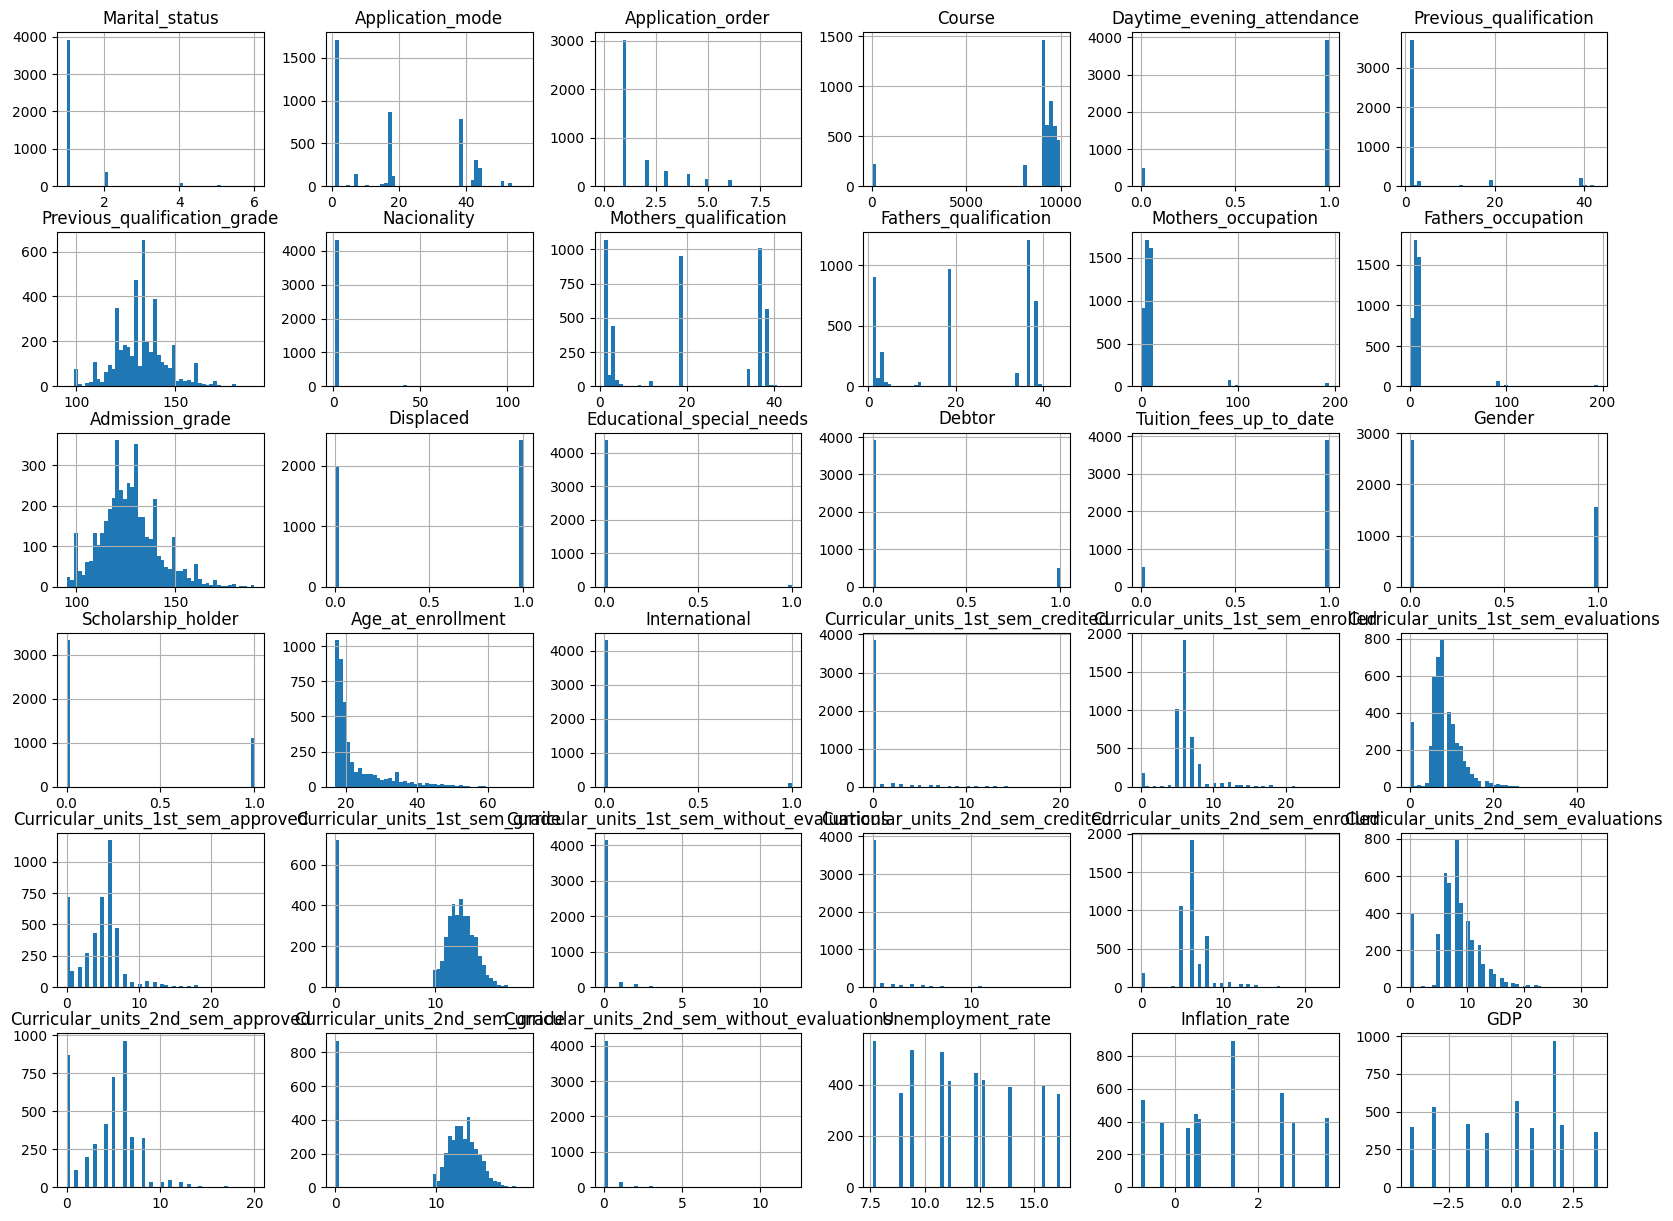

In [ ]:
data[data.columns].hist(bins=50, figsize=(20,15))
plt.show

Kita bisa mendapatkan gambaran yang cukup baik tentang fitur numerik, seperti apa bentuknya, nilai umumnya di sejumlah besar rumah, dan distribusinya dari gambar di atas. Kita tidak akan membahas setiap fitur secara terperinci di sini. Akan lebih baik jika kita melihat korelasi di antara berbagai fitur.

In [ ]:
sns.pairplot(data, diag_kind = 'kde')

Korelasi dan outlier (Numerik)

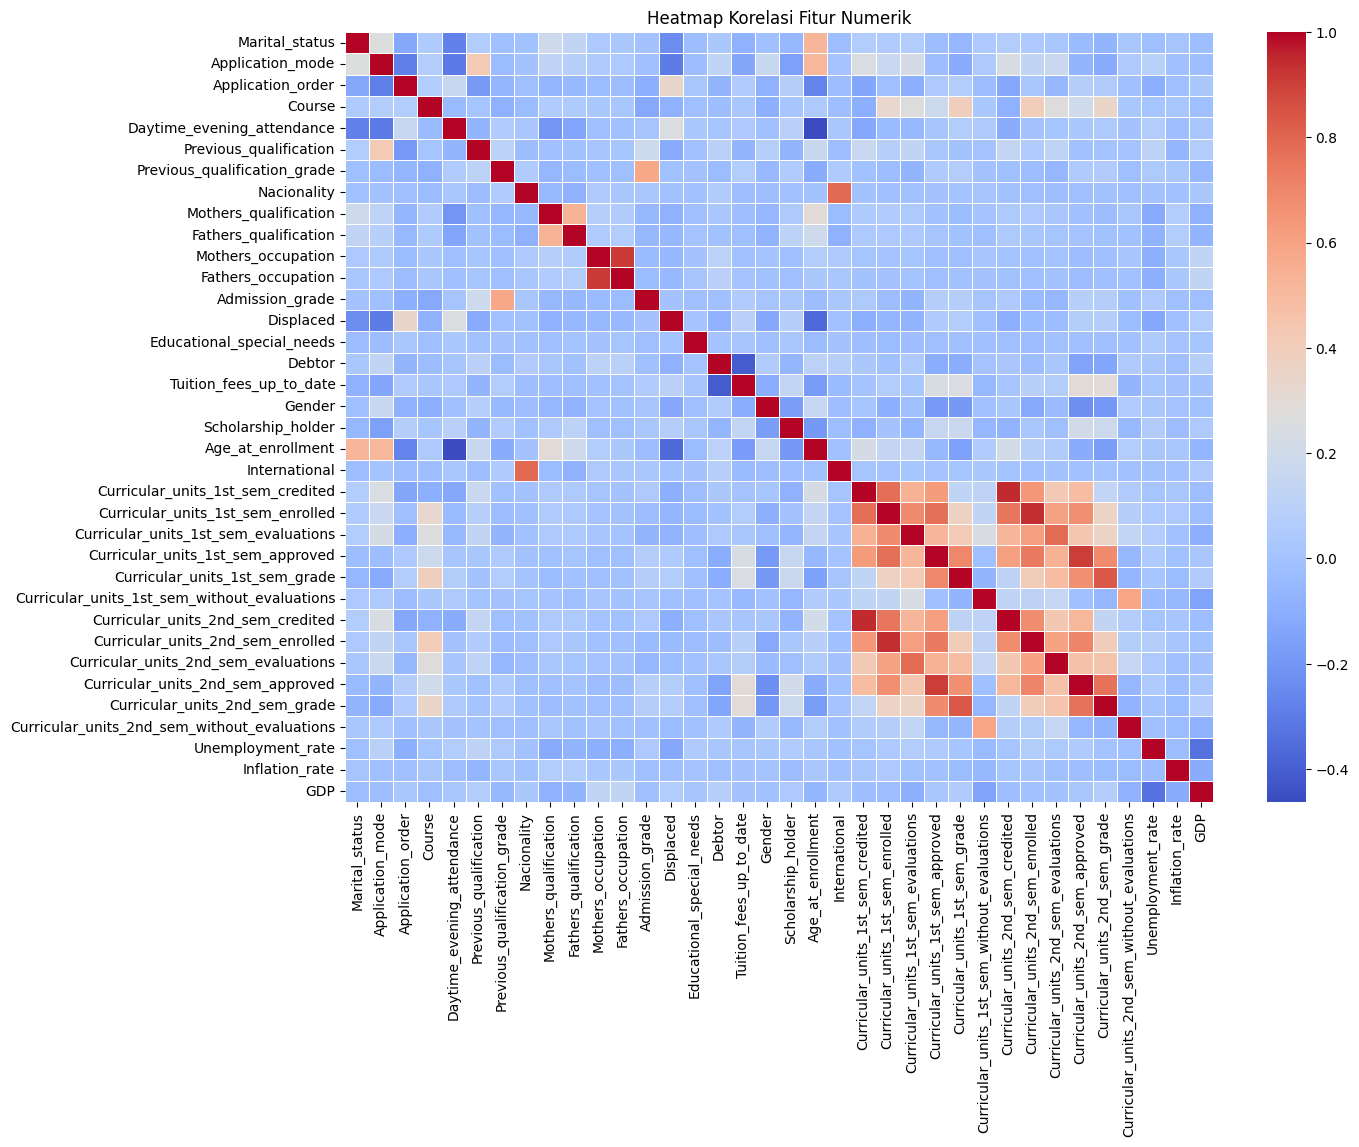

In [ ]:
# Korelasi antar fitur numerik
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = data[numeric_cols].corr()

# Heatmap korelasi
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()

Kita dapat melihat dari matriks korelasi bahwa sebagian besar fitur berkorelasi kuat dan positif satu sama lain (semakin terang warna jingga, semakin kuat korelasi positifnya dan warna biru yang kuat menunjukkan korelasi negatif yang kuat) dan sangat sedikit yang berkorelasi negatif. Hanya beberapa fitur yang berkorelasi lemah positif atau negatif.

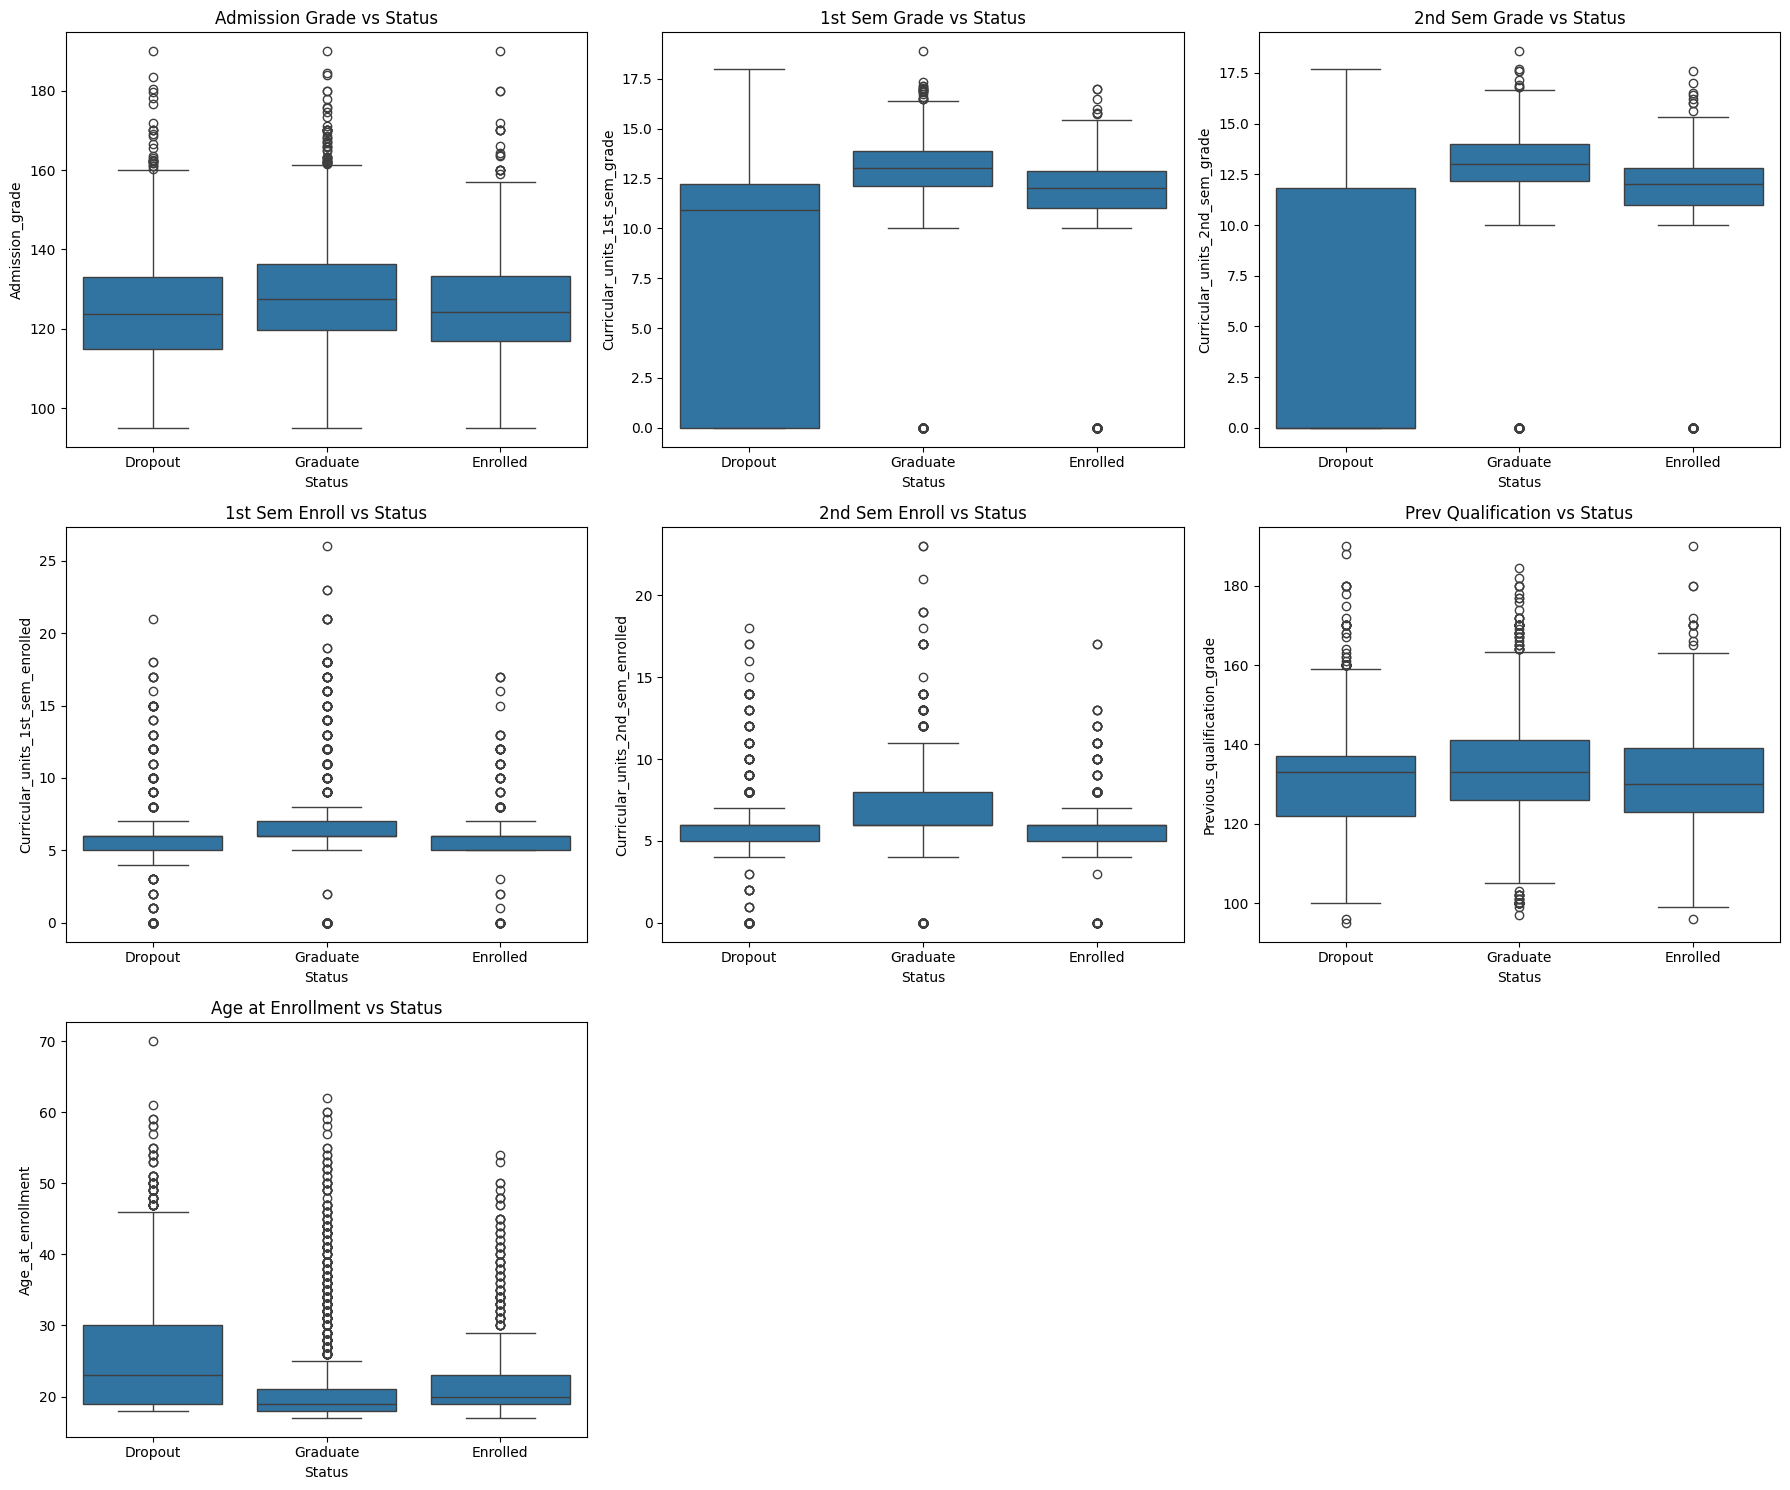

In [ ]:
plt.figure(figsize=(18, 15))

# Boxplot 1: Admission Grade
plt.subplot(3, 3, 1)
sns.boxplot(data=data, x='Status', y='Admission_grade')
plt.title('Admission Grade vs Status')
plt.xticks()

# Boxplot 2: Curricular Units 1st Semester Grade
plt.subplot(3, 3, 2)
sns.boxplot(data=data, x='Status', y='Curricular_units_1st_sem_grade')
plt.title('1st Sem Grade vs Status')
plt.xticks()

# Boxplot 3: Curricular Units 2nd Semester Grade
plt.subplot(3, 3, 3)
sns.boxplot(data=data, x='Status', y='Curricular_units_2nd_sem_grade')
plt.title('2nd Sem Grade vs Status')
plt.xticks()

# Boxplot 4: Curricular Units 1st Semester Enrolled
plt.subplot(3, 3, 4)
sns.boxplot(data=data, x='Status', y='Curricular_units_1st_sem_enrolled')
plt.title('1st Sem Enroll vs Status')
plt.xticks()

# Boxplot 5: Curricular Units 2nd Semester Enrolled
plt.subplot(3, 3, 5)
sns.boxplot(data=data, x='Status', y='Curricular_units_2nd_sem_enrolled')
plt.title('2nd Sem Enroll vs Status')
plt.xticks()

# Boxplot 6: Previous Qualification Grade
plt.subplot(3, 3, 6)
sns.boxplot(data=data, x='Status', y='Previous_qualification_grade')
plt.title('Prev Qualification vs Status')
plt.xticks()

# Boxplot 7: Age at Enrollment
plt.subplot(3, 3, 7)
sns.boxplot(data=data, x='Status', y='Age_at_enrollment')
plt.title('Age at Enrollment vs Status')
plt.xticks()

plt.tight_layout()
plt.show()

Insight:

1. Admission Grade vs Status
 * Mahasiswa dropout cenderung memiliki nilai masuk (admission grade) lebih rendah dibandingkan yang graduate atau enrolled.
 * Menunjukkan bahwa kualitas akademik awal dapat menjadi indikator risiko dropout.
2. 1st Sem Grade vs Status
 * Nilai semester 1 mahasiswa dropout lebih rendah secara signifikan.
 * Banyak outlier di bawah nilai minimum, menunjukkan masalah performa akademik awal sangat terkait dengan risiko keluar.

3. 2nd Sem Grade vs Status
 * Pola mirip dengan semester 1: mahasiswa dropout memiliki nilai semester 2 yang jauh lebih rendah.
 * Bahkan ada yang nilai semester 2-nya nol, mengindikasikan mungkin tidak aktif atau gagal semua mata kuliah.

4. 1st Sem Enrolled vs Status
 * Jumlah mata kuliah yang diambil mahasiswa dropout lebih sedikit pada semester pertama.
 * Ini bisa jadi karena keterbatasan kemampuan atau strategi bertahan hidup di awal kuliah.

5. 2nd Sem Enrolled vs Status
 * Jumlah SKS yang diambil semester 2 juga lebih rendah untuk yang dropout.
 * Beberapa mahasiswa dropout tampaknya tidak mengambil kuliah sama sekali (outlier nol).

6. Previous Qualification Grade vs Status
 * Mahasiswa dropout memiliki rata-rata nilai kualifikasi sebelumnya (sebelum kuliah) lebih rendah.
 * Sama seperti admission grade, menunjukkan kualitas akademik awal punya pengaruh.

7. Age at Enrollment vs Status
 * Mahasiswa dropout memiliki rentang usia masuk yang lebih lebar dan rata-rata lebih tua.
 * Ini mungkin terkait dengan faktor non-akademik seperti tanggung jawab keluarga, finansial, atau pekerjaan.

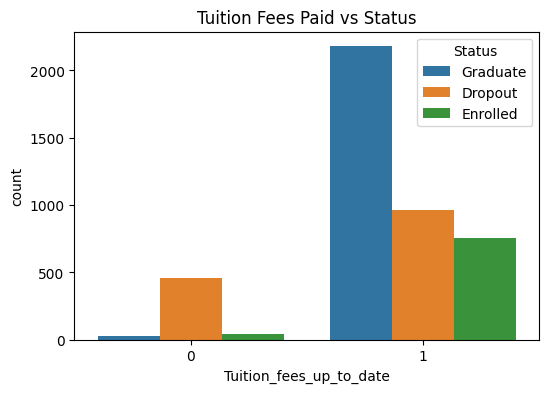

In [ ]:
# Tuition Fees Up To Date
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Tuition_fees_up_to_date', hue='Status')
plt.title('Tuition Fees Paid vs Status')
plt.show()

Insight:
* Apakah biaya kuliah siswa sudah sesuai dengan yang seharusnya.
* Mahasiswa dropout lebih banyak dibandingkan dengan graduate dan enrolled mengenai biaya kuliah yang tidak sesuai.
* Ini memungkinkan mahasiswa dropout dikarenakan biaya kuliah yang tidak sesuai (lebih tinggi).

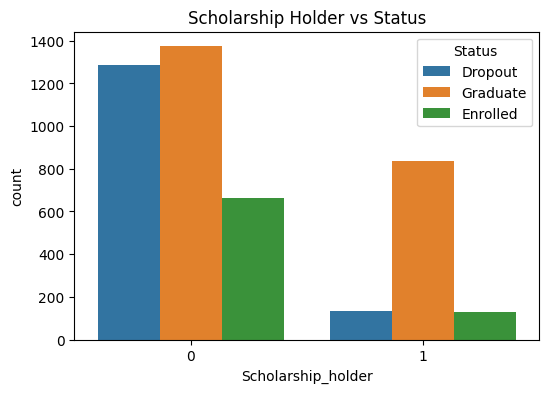

In [ ]:
# Scholarship Holder
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Scholarship_holder', hue='Status')
plt.title('Scholarship Holder vs Status')
plt.show()

Insight:
* Jumlah penerima beasiswa banyak mahasiswa gradute, namun juga ada mahasiswa dropout yang jumlahnya dibawah 200.
* Mahasiswa graduate dan dropout jumlahnya hampir sama untuk yang tidak menerima beasiswa.
* Hal ini mungkin terkait dengan faktor finansial pada mahasiswa dropout.

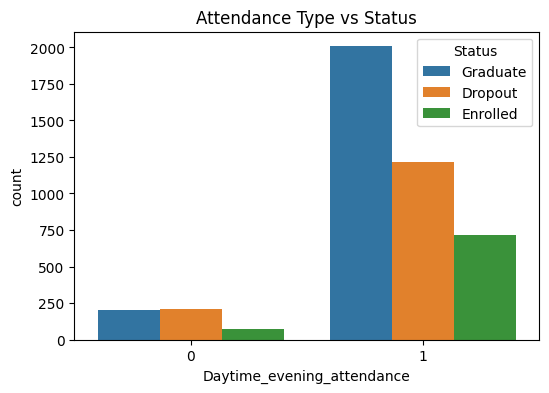

In [ ]:
# Attendance Type
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Daytime_evening_attendance', hue='Status')
plt.title('Attendance Type vs Status')
plt.show()

Insight:
* Variabel ini menyatakan apakah mahasiswa hadir di siang hari (1) atau malam hari (0).
*Mahasiswa siang hari (1) lebih banyak jumlahnya dan lebih besar proporsinya yang graduate.
*Mahasiswa malam hari (0) memiliki proporsi dropout yang relatif lebih tinggi, menunjukkan kelas malam memiliki risiko dropout lebih besar.

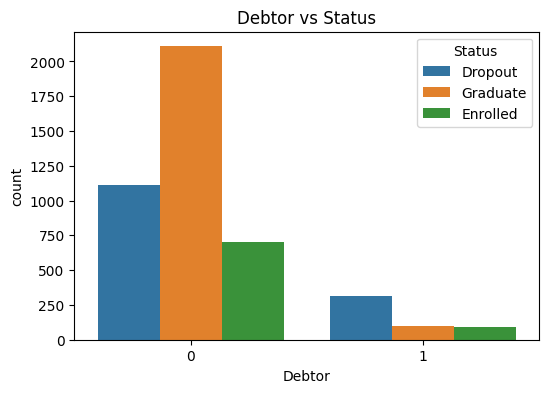

In [ ]:
# Attendance Type
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Debtor', hue='Status')
plt.title('Debtor vs Status')
plt.show()

Insight:
* Variabel ini menunjukkan apakah mahasiswa memiliki utang akademik/keuangan (1) atau tidak (0).
* Mayoritas mahasiswa dropout adalah yang tidak berstatus debtor, namun yang menjadi debtor cenderung lebih banyak dropout dibanding graduate atau enrolled.
* Ini menunjukkan bahwa utang bukan satu-satunya penyebab dropout, tapi bisa memperburuk kemungkinan dropout bila digabung dengan faktor lain (misalnya nilai rendah, usia, dll).

<Axes: xlabel='Status', ylabel='Curricular_units_1st_sem_grade'>

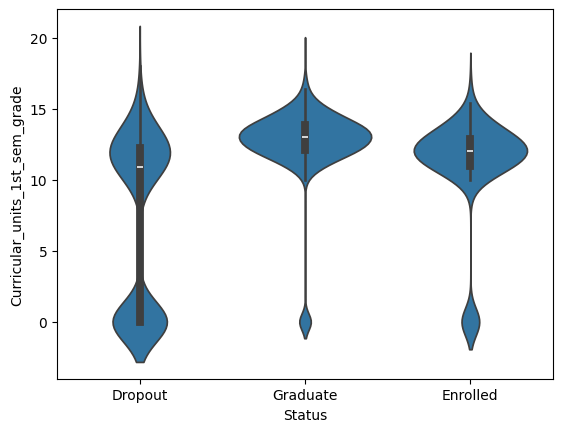

In [ ]:
sns.violinplot(x='Status', y='Curricular_units_1st_sem_grade', data=data)

Insight:
* Mahasiswa dropout memiliki distribusi nilai semester 1 yang sangat bervariasi, dengan banyak yang gagal total.
* Nilai rendah di semester 1 bisa jadi indikator kuat risiko dropout.
* Violin plot ini sangat berguna untuk menunjukkan keragaman dan pola distribusi antar kelompok dibanding hanya boxplot saja.

<Axes: xlabel='Status', ylabel='Curricular_units_1st_sem_grade'>

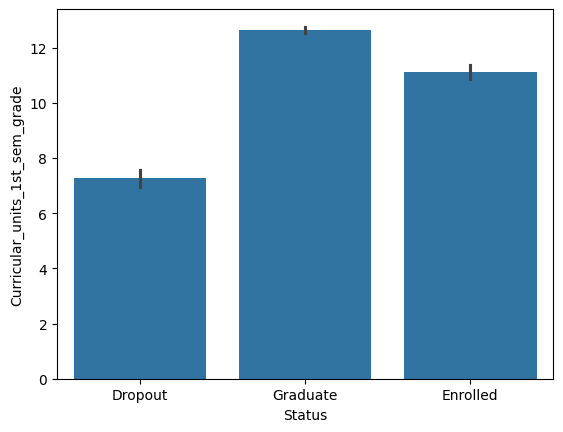

In [ ]:
sns.barplot(x='Status', y='Curricular_units_1st_sem_grade', data=data)


## Data Preparation / Preprocessing

Pada tahapan preprocessing ini, yang kita lakukan Seleksi Fitur berdasarkan hasil dari EDA, Encoding data kategorik (label encoding), Splitting dataset dan Feature scalling. Berdasarkan data understanding, dataset tidak ada missing values dan data duplikat, sehingga kita perlu menanganinya. Meskipun terdapat outlier pada beberapa fitur dari hasil boxplot, namun kita pertahankan. Mengapa demikian? karena outlier mencerminkan kasus penting dalam konteks dropout kali ini. Contoh: Siswa dengan nilai 0, tidak evaluasi sama sekali, atau gagal semua, maka mungkin memang kandidat dropout. Nilai rendah ekstrem (mis. nilai = 0, evaluasi = 0) berkontribusi pada prediksi dropout. Nilainya masuk akal secara kontekstual (misalnya memang ada mahasiswa yang tidak hadir sama sekali).

In [ ]:
df = data.copy()

In [ ]:
df.head()

Marital_status  Application_mode  Application_order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime_evening_attendance  Previous_qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous_qualification_grade  Nacionality  Mothers_qualification  \
0                         122.0            1                     19   
1                         160.0            1                      1   
2                         122.0            1                     37   
3                         122.0            1                     38   
4                         100.0            1                     37   

   Fathers_qualification  ...  Curricular_units_2nd_sem_credited  \
0                     12  ...                                  0   
1                      3  ...                                  0   
2                     37  ...                                  0   
3                     37  ...                                  0   
4                     38  ...                                  0   

   Curricular_units_2nd_sem_enrolled  Curricular_units_2nd_sem_evaluations  \
0                                  0                                     0   
1                                  6                                     6   
2                                  6                                     0   
3                                  6                                    10   
4                                  6                                     6   

   Curricular_units_2nd_sem_approved  Curricular_units_2nd_sem_grade  \
0                                  0                        0.000000   
1                                  6                       13.666667   
2                                  0                        0.000000   
3                                  5                       12.400000   
4                                  6                       13.000000   

   Curricular_units_2nd_sem_without_evaluations  Unemployment_rate  \
0                                             0               10.8   
1                                             0               13.9   
2                                             0               10.8   
3                                             0                9.4   
4                                             0               13.9   

   Inflation_rate   GDP    Status  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

### Pemilihan fitur

Pada pemilihan fitur kali ini, kita membuat dan menambahkan fitur turunan ke dataframe mahasiswa. Fitur turunan (feature engineering/derived features) adalah fitur (kolom) baru yang kamu buat dari fitur yang sudah ada, dengan tujuan agar model machine learning lebih mudah mengenali pola dan meningkatkan akurasi prediksi. Tujuan fitur turunan:
* Menyediakan informasi tambahan yang lebih bermakna.
* Menggabungkan beberapa fitur menjadi satu representasi yang lebih kuat.
* Menangkap relasi antar fitur yang mungkin penting tapi tidak terlihat dari fitur asli.

Kenapa ini berguna? Model ML tidak bisa "berpikir" seperti manusia. Misalnya, jika ada mahasiswa dengan penurunan IPK, model tidak tahu itu buruk kecuali kamu secara eksplisit membuat fitur seperti `ipk_diff`(`Ipk_sem2 - Ipk_sem1`). Fitur turunan memberi model lebih banyak sinyal, seperti: "Semakin besar selisih IPK, semakin besar kemungkinan dropout".

Kenapa menggunakan fitur turunan?
1. Menangkap pola yang tidak langsung terlihat

  Banyak hubungan antar variabel yang tidak eksplisit atau tidak langsung terlihat dalam data mentah. Misalnya:
  * fitur asli hanya memberi tahu berapa banyak mata kuliah yang diambil dan disetujui.
  * Fitur turunan seperti `Approval_rate` (jumlah disetujui / jumlah diambil) memberikan indikasi efisiensi belajar mahasiswa.

2. Meningkatkan performa model

  Model machine learning lebih mudah menemukan pola yang sudah diproses dengan logika domain. Fitur turunan bisa membantu meningkatkan akurasi dan generalisasi model karena:
  * Model tidak harus belajar sendiri hubungan kompleks antar fitur.
  * Reduksi noise dan highlighting informasi penting.

3. Menyesuaikan dengan konteks bisnis/domain

  Beberapa insight lebih bermakna secara manajerial jika dibuat dalam bentuk turunan, misalnya:
  * Diff_grade_sem = selisih nilai antara semester 2 dan semester 1, maka bisa menunjukkan penurunan atau peningkatan performa akademik.
  * Ini sangat relevan untuk mendeteksi dropout akibat kemerosotan performa.

Berikut adalah fungsi untuk menambahkan fitur turunan ke dataset berdasarkan 8 fitur awal yaitu Curricular_units_1st_sem_enrolled, Curricular_units_1st_sem_approved, Curricular_units_2nd_sem_enrolled, Curricular_units_2nd_sem_approved, Age_at_enrollment, Tuition_fees_up_to_date, Scholarship_holder, dan Debtor.

In [ ]:
def add_derived_features(df):
    """
    Menambahkan fitur turunan ke dataframe mahasiswa.
    Asumsi: dataframe sudah memiliki 8 fitur utama.
    """
    # konversi ke skala 4.0
    df['Ipk_sem1'] = (df['Curricular_units_1st_sem_grade'] / 20) * 4
    df['Ipk_sem2'] = (df['Curricular_units_2nd_sem_grade'] / 20) * 4

    # Proporsi SKS yang diluluskan semester 1 & 2
    df['proporsi_sks_1'] = df['Curricular_units_1st_sem_approved'] / df['Curricular_units_1st_sem_enrolled'].replace(0, 1)
    df['proporsi_sks_2'] = df['Curricular_units_2nd_sem_approved'] / df['Curricular_units_2nd_sem_enrolled'].replace(0, 1)

    # Perubahan IPK semester 1 ke 2
    df['delta_ipk'] = df['Ipk_sem2'] - df['Ipk_sem1']

    # Kemajuan jumlah SKS lulus semester 2 dibanding semester 1
    df['kemajuan_sks'] = df['Curricular_units_2nd_sem_approved'] - df['Curricular_units_1st_sem_approved']

    # Skor status pembayaran: 0 = lancar, 1 = ada salah satu kendala, 2 = keduanya bermasalah
    df['status_pembayaran'] = df['Tuition_fees_up_to_date'].apply(lambda x: 0 if x == 1 else 1) + df['Debtor']

    return df

Setelah kamu load dataset dan pilih fitur, jalankan fungsi ini

In [ ]:
df = add_derived_features(df)

Kemudian fitur yang dipakai untuk pelatihan model jadi seperti ini:

In [ ]:
features = [
    'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_approved','Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_approved', 'Ipk_sem1',
    'Ipk_sem2', 'Age_at_enrollment', 'Tuition_fees_up_to_date', 'Scholarship_holder', 'Debtor', 'proporsi_sks_1', 'proporsi_sks_2', 'delta_ipk', 'kemajuan_sks', 'status_pembayaran'
]

Selanjutnya melakukan konversi label kategori 'Graduate' dan 'Dropout' menjadi nilai numerik dilakukan menggunakan teknik label encoding. Hal ini bertujuan untuk mempersiapkan data target agar dapat diproses oleh algoritma klasifikasi yang memerlukan input numerik.

In [ ]:
df = df[df['Status'].isin(['Graduate', 'Dropout'])].copy()
df['Target'] = df['Status'].map({'Graduate': 0, 'Dropout': 1})

Mapping ini membuat kolom Target yang siap digunakan sebagai variabel target/output dalam training model. Kelas 'Enrolled' tidak digunakan dalam proses pelatihan model, karena enrolled merupakan status sementara yang belum menggambarkan hasil akhir pendidikan mahasiswa. Fokus analisis diarahkan pada dua outcome akhir yaitu 'Graduate' (berhasil menyelesaikan studi) dan 'Dropout' (tidak berhasil menyelesaikan studi), untuk membangun model klasifikasi yang mampu mendeteksi potensi risiko dropout secara lebih akurat.

In [ ]:
df['Target'].value_counts()

Target
0    2209
1    1421
Name: count, dtype: int64

### Train-Test Split

Pisahkan data menjadi Fitur (X) dan Target (y)

In [ ]:
X = df[features]
y = df['Target']

In [ ]:
print(y.unique())

[1 0]


Kemudian membagi data menjadi Train 80% dan Test 20%.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(2904, 15)
(726, 15)


### Feature Scaling

Lalu melakukan scaling pada data numerik.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modeling

Pada tahapan modeling kali ini, berdasarkan karakteristik data:
* Jumlah fitur lumayan banyak (10+ fitur). Cocok untuk algoritma yang bisa menangani banyak fitur tanpa terlalu terpengaruh oleh multikolinearitas.
* Target bersifat kategorik (binary classification). Hanya 2 kelas target: Graduate (0) dan Dropout (1).
* Tidak linear dan kompleksitas interaksi. Diduga ada interaksi non-linear antar fitur yang sulit ditangkap oleh model linear seperti Logistic Regression.

Maka dari itu kita menggunakan Random Forest dan XGboost. Random Forest dan XGBoost dipilih karena keduanya sangat efektif untuk data tabular yang memiliki campuran fitur numerik dan kategorikal, serta target klasifikasi biner. Random Forest cocok sebagai baseline karena stabil, mudah diinterpretasikan dan tahan terhadap outlier, sedangkan XGBoost ditambahkan untuk meningkatkan performa model dan menjawab kebutuhan akan model dengan kompleksitas tinggi, meskipun cukup sensitif terhadap outlier tapi tidak separah model linear seperti Linear Regression atau Logistic Regression.

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(
    n_estimators=800,
    max_depth=None,
    min_samples_split=3,
    min_samples_leaf=1,
    max_features='log2',
    random_state=42
)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

In [ ]:
# XGBoost
xgb_model = xgb.XGBClassifier(
    n_estimators=400,
    eval_metric='logloss',
    learning_rate=0.05,
    max_depth=20,
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

## Evaluation

In [ ]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
print(f"Random Forest - Accuracy: {rf_accuracy:.4f}")
print(f"Random Forest - F1 Score: {rf_f1:.4f}")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Random Forest - Accuracy: 0.9311
Random Forest - F1 Score: 0.9107
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       442
           1       0.92      0.90      0.91       284

    accuracy                           0.93       726
   macro avg       0.93      0.93      0.93       726
weighted avg       0.93      0.93      0.93       726

[[421  21]
 [ 29 255]]


In [ ]:
# XGBoost
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)
print(f"Random Forest - Accuracy: {xgb_accuracy:.4f}")
print(f"Random Forest - F1 Score: {xgb_f1:.4f}")
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))

Random Forest - Accuracy: 0.9187
Random Forest - F1 Score: 0.8945
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       442
           1       0.91      0.88      0.89       284

    accuracy                           0.92       726
   macro avg       0.92      0.91      0.91       726
weighted avg       0.92      0.92      0.92       726

[[417  25]
 [ 34 250]]


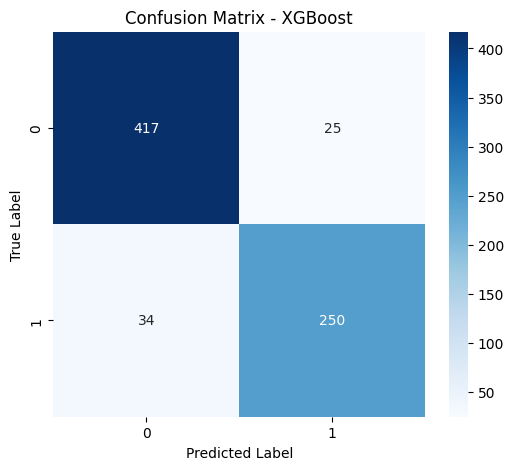

In [ ]:
cfm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 5))
sns.heatmap(cfm_xgb, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost")
plt.show()

Insight:

Random Forest
* Akurasi: 93%
* Precision & recall seimbang dan tinggi untuk kedua kelas.
* F1-score: 91% (dropout).
* Model sangat baik dalam mengenali mahasiswa dropout (recall 90%).

XGBoost
* Akurasi: 92%
* Hasil serupa, sedikit lebih banyak kesalahan di kelas dropout (recall 88%).

Kesimpulan: Random Forest sedikit lebih unggul.

### Feature selection

Berdasarkan hasil dari kedua model tersebut, kemudian kita melakukan Feature Importance. Feature importance adalah sebuah metode dalam machine learning yang digunakan untuk menentukan seberapa penting setiap fitur atau variabel input dalam memprediksi output model. Dengan mengetahui feature importance, kita dapat memahami fitur mana yang paling berpengaruh dalam model dan dapat digunakan untuk meningkatkan kinerja model, mengurangi overfitting, dan mendapatkan wawasan lebih baik tentang data.

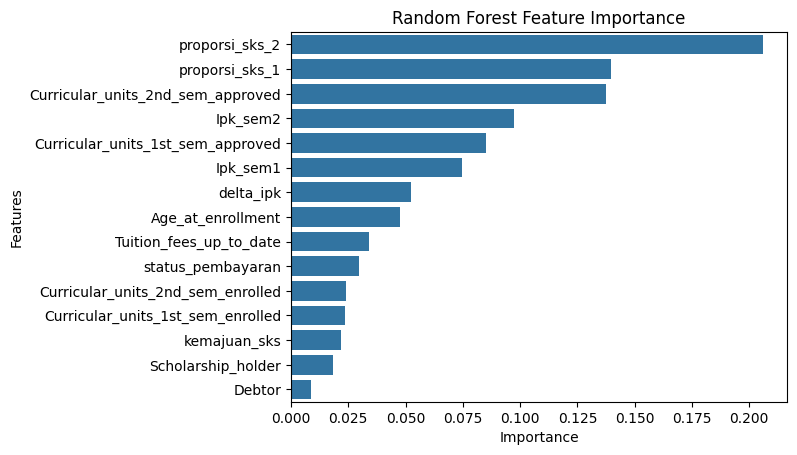

In [ ]:
feature_importances = rf_model.feature_importances_
features = X.columns

# Mengurutkan fitur berdasarkan importance
sorted_idx = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_idx]
sorted_features = features[sorted_idx]

# Bar plot dengan sorted data
sns.barplot(x=sorted_feature_importances, y=sorted_features)
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

Fitur turunan ternyata sangat kuat dalam memprediksi dropout. IPK dan SKS semester 2 lebih penting dibanding semester 1, masuk akal karena semester 2 bisa menjadi indikasi kuat apakah mahasiswa mulai kesulitan atau tidak. Keuangan (Debtor, status_pembayaran) relatif rendah kontribusinya, yang berarti dalam data ini, faktor akademik lebih menentukan dibanding finansial secara eksplisit.

In [ ]:
# Pemilihan 10 fitur teratas berdasarkan Feature Importance
top10_features = [
    'proporsi_sks_2',
    'proporsi_sks_1',
    'Curricular_units_2nd_sem_approved',
    'Ipk_sem2',
    'Ipk_sem1',
    'Curricular_units_1st_sem_approved',
    'delta_ipk',
    'Age_at_enrollment',
    'Tuition_fees_up_to_date',
    'status_pembayaran'
]

In [ ]:
X1 = df[top10_features]
y1 = df['Target']

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y1)

In [ ]:
# Train ulang model
rf_selected = RandomForestClassifier(
    n_estimators=250,
    max_depth=20,
    min_samples_split=3,
    min_samples_leaf=1,
    max_features='log2',
    class_weight='balanced',
    random_state=42
)
rf_selected.fit(X_train1, y_train1)
y_pred_rf_selec = rf_selected.predict(X_test1)

In [ ]:
# Evaluasi
accuracy_rf = accuracy_score(y_test1, y_pred_rf_selec)
f1_rf = f1_score(y_test1, y_pred_rf_selec)
print(f"Random Forest - Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest - F1 Score: {f1_rf:.4f}")
print(classification_report(y_test1, y_pred_rf_selec))
print(confusion_matrix(y_test1, y_pred_rf_selec))

Random Forest - Accuracy: 0.9146
Random Forest - F1 Score: 0.8924
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       442
           1       0.88      0.90      0.89       284

    accuracy                           0.91       726
   macro avg       0.91      0.91      0.91       726
weighted avg       0.92      0.91      0.91       726

[[407  35]
 [ 27 257]]


Insight:
* Dengan 10 fitur saja, performa masih nyaris sama (F1-score dropout dari 0.91 → 0.89). Ini menunjukkan bahwa 10 fitur tersebut sudah mewakili mayoritas informasi penting. Serta akan mempercepat inference di produksi dan menyederhanakan input form di Streamlit atau sistem lain.
* Random Forest dengan 10 fitur: ideal untuk production jika ingin efisiensi dan kesederhanaan. Jika model akan dikembangkan lebih lanjut, XGBoost dengan 15 fitur bisa menjadi baseline untuk eksperimen lanjutan (misal tuning atau ensemble).
* Nilai recall untuk kelas dropout (class 1) sebesar 0.90 sangat baik. Artinya, model bisa menangkap mayoritas siswa yang berisiko tinggi sesuai tujuan utama proyek.



## Simpan Model

In [ ]:
import joblib

In [ ]:
joblib.dump(rf_selected, 'model.joblib')

Terakhir kita simpan model dari Random Forest dengan menggunakan fitur model berdasarkan dari feature importance.

Meskipun hasil model dengan 15 fitur memberikan sedikit akurasinya lebih tinggi (0.93 vs 0.91), namun memilih model dengan 10 fitur bisa jadi lebih baik dalam konteks aplikasi nyata, karena:

1. Simplicity & Interpretability

  Model dengan 10 fitur lebih mudah dipahami dan dijelaskan ke pemangku kepentingan, misalnya dosen atau manajemen kampus. Ini sangat penting kalau kamu akan membuat dashboard atau laporan.

2. Generalization (Avoid Overfitting)

  Dengan fitur lebih sedikit, model cenderung tidak terlalu overfit pada data pelatihan. Artinya performa di dunia nyata (data baru) bisa lebih stabil, meski akurasi pelatihannya sedikit lebih rendah.

3. Efisiensi

  Lebih sedikit fitur = lebih cepat saat inference, terutama jika model ini akan digunakan di sistem monitoring atau Streamlit app.